In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import math
import mpld3

In [2]:
pd.set_option('display.max_columns', None)

## Read in data - quicklook

In [3]:
data_file = 'datasets/LabResults_0.tsv'

In [4]:
#  Code from Keegan - encoding error using encoding="utf-16", 
# I tried “utf-16-le” or “utf-16-be”. but didn't seem to help.
# Just removing the encoding argument seems to work

# UnicodeError: UTF-16 stream does not start with BOM

# data = pd.read_csv(data_file, 
#                    header=0,
#                     skip_blank_lines=True, 
#                     encoding="utf-16",
#                     sep='\t',
#                 )

In [5]:
# parse date columns
date_cols = ['created_at',
             'deleted_at',
             'updated_at',
             'tested_at']

In [6]:
lab_results_df = pd.read_csv(data_file,header=0, skip_blank_lines=True, sep = '\t', parse_dates = date_cols)

/Users/aliceallafort/Documents/Software/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (4,12,13,14,47,70,79,82,83,88,89,113,119,182) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
def explore_df(df):
    print(type(df))
    print(df.shape)
    print(df.info())
    display(df.head())
    display(df.tail())
    display(df.describe())

In [10]:
explore_df(lab_results_df)

<class 'pandas.core.frame.DataFrame'>
(1954681, 185)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954681 entries, 0 to 1954680
Columns: 185 entries, global_id to high_cbd_flag
dtypes: bool(6), datetime64[ns](4), float64(146), object(29)
memory usage: 2.6+ GB
None


,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm
count,490007.000000,112274.0,112274.0,348526.000000,1.894417e+06,1.622045e+06,1.891216e+06,1.624322e+06,136523.000000,3.531700e+04,143253.000000,3.674800e+04,1.864715e+06,1.573331e+06,1.872378e+06,1.572710e+06,90865.000000,3.547700e+04,172682.000000,3.979800e+04,172359.000000,37114.000000,154902.000000,3.837000e+04,146431.000000,3.885700e+04,0.0,16444.000000,15573

In [11]:
display(lab_results_df.select_dtypes(include=[bool]).head())
display(lab_results_df.select_dtypes(include=[object]).head())

,foreign_matter,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes,high_thc_flag,high_cbd_flag
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


,global_id,mme_id,user_id,external_id,inventory_id,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,received_at,type,cannabinoid_status,terpenoid_status,microbial_status,microbial_editor,mycotoxin_status,mycotoxin_editor,metal_status,metal_editor,pesticide_status,pesticide_editor,solvent_status,solvent_editor,intermediate_type,global_for_inventory_id
0,NaN,WAWA1.MMCY,WAWA1.US29D,5275985106676286.0,WAJ412964.INCP,not tested,completed,WAJ412964.BA1JS,WAWA1.MMCY,NaN,NaN,NaN,WAWA1.US29D,1900-01-01 00:00:00,intermediate_product,completed,NaN,completed,WAWA1.US1,completed,WAWA1.US1,NaN,NaN,NaN,NaN,completed,WAWA1.US1,hydrocarbon_concentrate,NaN
1,WAJ412964.LR2,WAWA1.MMCY,WAWA1.US29D,4129640000001061.0,WAJ412964.ING1,passed,completed,WAJ412964.BA1LC,WAWA1.MMCY,NaN,NaN,NaN,WAWA1.US29D,1900-01-01 00:00:00,harvest_materials,completed,NaN,completed,WAWA1.US1,completed,WAWA1.US1,NaN,NaN,NaN,NaN,completed,WAWA1.US1,flower_lots,WAJ412964.ING1
2,NaN,WAWA1.MMCY,WAWA1.US29D,5275985106676286.0,WAJ412964.INCP,not tested,completed,WAJ412964.BA1JS,WAWA1.MMCY,NaN,NaN,NaN,WAWA1.US29D,1900-01-01 00:00:00,intermediate_product,completed,NaN,completed,WAWA1.US1,completed,WAWA1.US1,NaN,NaN,NaN,NaN,completed,WAWA1.US1,hydrocarbon_concentrate,NaN
3,NaN,WAWA1.MMCY,WAWA1.US29D,5275985106676286.0,WAJ412964.INCP,not tested,completed,WAJ412964.BA1JS,WAWA1.MMCY,NaN,NaN,NaN,WAWA1.US29D,1900-01-01 00:00:00,intermediate_product,completed,NaN,completed,WAWA1.US1,completed,WAWA1.US1,NaN,NaN,NaN,NaN,completed,WAWA1.US1,hydrocarbon_concentrate,NaN
4,NaN,WAWA1.MMCY,WAWA1.US29D,5275985106676286.0,WAJ412964.INCP,not tested,completed,WAJ412964.BA1JS,WAWA1.MMCY,NaN,NaN,NaN,WAWA1.US29D,1900-01-01 00:00:00,intermediate_product,completed,NaN,completed,WAWA1.US1,completed,WAWA1.US1,NaN,NaN,NaN,NaN,completed,WAWA1.US1,hydrocarbon_concentrate,NaN


## Cleaning and Adding Features

In [12]:
# From Charles Rice
# drop decpreciated columns
decpreciated_cols = ['cannabinoid_cbc_mg_g',
                     'cannabinoid_cbc_percent',
                     'cannabinoid_cbdv_mg_g',
                     'cannabinoid_cbga_mg_g',
                     'cannabinoid_cbga_percent',
                     'cannabinoid_cbn_mg_g',
                     'cannabinoid_cbn_percent',
                     'cannabinoid_thcv_mg_g',
                     'cannabinoid_thcv_percent',
                     'global_for_inventory_id',
                     'for_mme_id',
                     'herbicides_ppm',
                     'high_cbd_flag',
                     'high_thc_flag',
                     'microbial_aerobic_bacteria_cfu_g',
                     'microbial_total_coliform_cfu_g',
                     'microbial_total_viable_plate_count_cfu_g',
                     'microbial_total_yeast_mold_cfu_g',
                     'pesticide_bifentrin_ppm',
                     'pesticide_captan_ppm',
                     'pesticide_dimethomorph_ppm',
                     'pesticide_fenhexamid_ppm',
                     'pesticide_pcnb_ppm',
                     'pesticide_piperonyl_butoxide_ppm',
                     'pesticide_pyrethrin_ppm',
                     'pesticide_spinetoram_ppm',
                     'received_at',
                     'solvent_heptanes_ppm',
                     'terpenoid_b_caryophyllene_mg_g',
                     'terpenoid_b_caryophyllene_percent',
                     'terpenoid_b_myrcene_mg_g',
                     'terpenoid_b_myrcene_percent',
                     'terpenoid_b_pinene_mg_g',
                     'terpenoid_b_pinene_percent',
                     'terpenoid_bisabolol_mg_g',
                     'terpenoid_bisabolol_percent',
                     'terpenoid_caryophyllene_oxide_mg_g',
                     'terpenoid_caryophyllene_oxide_percent',
                     'terpenoid_editor',
                     'terpenoid_humulene_mg_g',
                     'terpenoid_humulene_percent',
                     'terpenoid_limonene_mg_g',
                     'terpenoid_limonene_percent',
                     'terpenoid_linalool_mg_g',
                     'terpenoid_linalool_percent',
                     'terpenoid_b_pinene_mg_g',
                     'terpenoid_b_pinene_percent',
                     'terpenoid_status',
                     'terpenoid_terpinolene_mg_g',
                     'terpenoid_terpinolene_percent']
                     
                     
lab_results_df.drop(labels = decpreciated_cols, axis = 1, inplace = True)

In [13]:
lab_results_df = lab_results_df.assign(doy =lab_results_df.updated_at.dt.dayofyear,
                                       day=lab_results_df.updated_at.dt.day,
                                       week=lab_results_df.updated_at.dt.isocalendar().week,
                                       month=lab_results_df.updated_at.dt.month,
                                       year=lab_results_df.updated_at.dt.year
                                      )

In [14]:
min(lab_results_df.updated_at),max(lab_results_df.updated_at)

(Timestamp('2018-01-31 22:34:19'), Timestamp('2020-10-10 15:00:46'))

## Exploratory analyses

### THC Content 

/Users/aliceallafort/Documents/Software/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


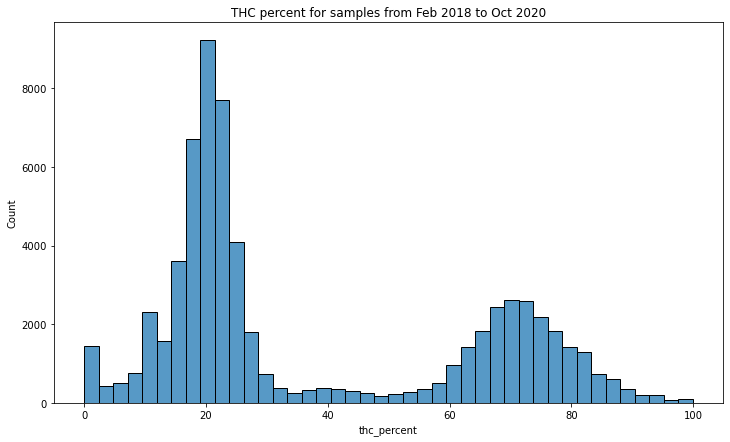

In [15]:
fig, ax = plt.subplots(figsize = (12,7))

sns.histplot(data = lab_results_df.thc_percent[(lab_results_df.thc_percent<100)&(lab_results_df.thc_percent>0)] )
ax.set_title('THC percent for samples from Feb 2018 to Oct 2020')
fig.show()

### Test date

In [26]:
lab_results_df[date_cols].isna().sum()

created_at          0
deleted_at    1952617
updated_at          0
tested_at           0
dtype: int64

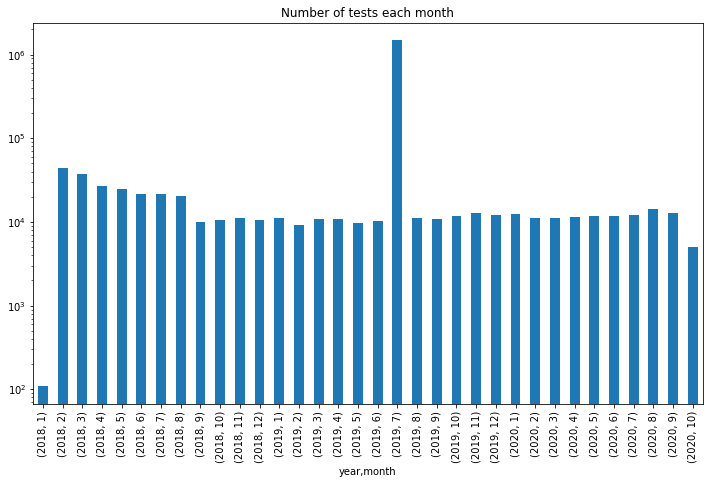

In [27]:
fig, ax = plt.subplots(figsize=(12,7))

lab_results_df['p']=1
df=lab_results_df.groupby([(lab_results_df.year),(lab_results_df.month)]).sum()
df.p.plot(kind='bar')
plt.yscale('log')
plt.title('Number of tests each month')
plt.show()

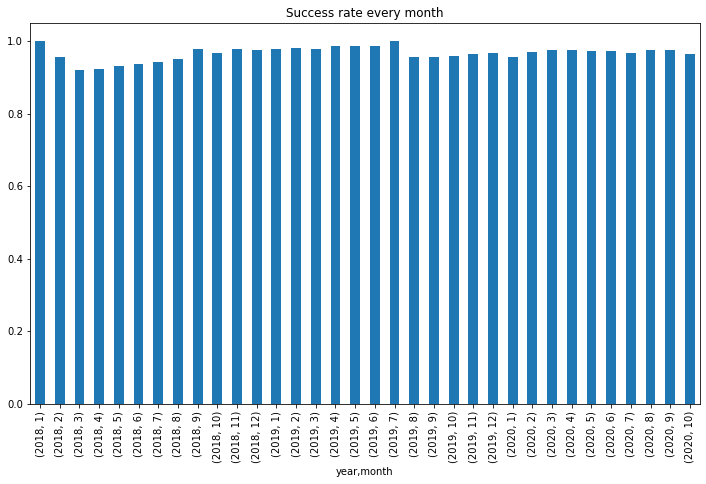

In [28]:
fig, ax = plt.subplots(figsize=(12,7))

lab_results_df['p']=1
df=lab_results_df.groupby([(lab_results_df.year),(lab_results_df.month)]).sum()
df['fraction'] = df.status/df.p


df.fraction.plot(kind='bar')
plt.title('Success rate every month')
plt.show()

### Failure rate

In [16]:
lab_results_df.status.value_counts()

passed        1934285
failed          20381
not tested         15
Name: status, dtype: int64

In [17]:
status_col=[c for c in lab_results_df.columns if c.find('status')>=0]
lab_results_df[status_col]

,status,testing_status,cannabinoid_status,microbial_status,mycotoxin_status,metal_status,pesticide_status,solvent_status
0,not tested,completed,completed,completed,completed,NaN,NaN,completed
1,passed,completed,completed,completed,completed,NaN,NaN,completed
2,not tested,completed,completed,completed,completed,NaN,NaN,completed
3,not tested,completed,completed,completed,completed,NaN,NaN,completed
4,not tested,completed,completed,completed,completed,NaN,NaN,completed
...,...,...,...,...,...,...,...,...
1954676,passed,completed,completed,NaN,NaN,NaN,NaN,NaN
1954677,passed,completed,completed,NaN,completed,NaN,NaN,completed
1954678,passed,completed,completed,completed,completed,NaN,NaN,NaN
1954679,passed,completed,completed,completed,completed,NaN,NaN,NaN


In [18]:
lab_results_df[status_col].isna().sum()

status                     0
testing_status           263
cannabinoid_status      3325
microbial_status       81813
mycotoxin_status       28022
metal_status          410755
pesticide_status      473443
solvent_status        395845
dtype: int64

In [19]:
lab_results_df[lab_results_df.testing_status.isnull()][status_col]

,status,testing_status,cannabinoid_status,microbial_status,mycotoxin_status,metal_status,pesticide_status,solvent_status
16681,failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16683,failed,NaN,NaN,in_progress,in_progress,NaN,NaN,NaN
16685,failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20473,failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20474,failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1802824,failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1829150,failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1877190,passed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883946,failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(len(lab_results_df.index))
lab_results_df = lab_results_df.loc[lab_results_df['status'].isin(['passed','failed'])]
print(len(lab_results_df.index))

1954681
1954666


In [21]:
lab_results_df["status"] = lab_results_df["status"].replace({'failed':0, 'passed':1})

In [22]:
def succ_frac(df,verb=False):
    _all = len(df.index)
    succ = len(df[df.status==1].index)
    if _all != 0: frac=succ/_all
    if _all==0: frac =1e-10

    if verb:
        print(_all,'total')
        binom_stat(_all,frac)

    return frac

succ_frac(lab_results_df)

0.9895731546975289

In [23]:
lab_results_df.type.value_counts().to_frame()

,type
end_product,1337472
marijuana,251034
harvest_materials,223861
intermediate_product,142134
mature_plant,36
waste,5
immature_plant,3


In [24]:
type_succ = pd.concat(
    [lab_results_df.type.value_counts().to_frame(),
     lab_results_df[lab_results_df.status==1].type.value_counts().to_frame().rename(columns={'type': 'passed'}),
    lab_results_df[lab_results_df.status==0].type.value_counts().to_frame().rename(columns={'type': 'failed'})],axis=1)

type_succ['fraction'] = type_succ.passed/type_succ.type
type_succ.sort_values('type',ascending=False)

,type,passed,failed,fraction
end_product,1337472,1337458,14.0,0.999990
marijuana,251034,234928,16106.0,0.935841
harvest_materials,223861,220920,2941.0,0.986862
intermediate_product,142134,140815,1319.0,0.990720
mature_plant,36,36,NaN,1.000000
waste,5,4,1.0,0.800000
immature_plant,3,3,NaN,1.000000


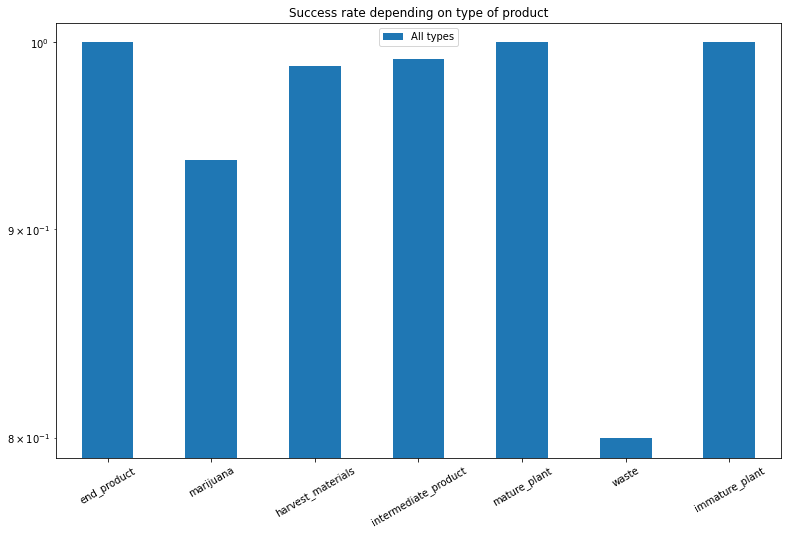

In [25]:
_, ax = plt.subplots(figsize=(13,8))
type_succ.fraction.plot(kind='bar', ax=ax,label='All types')
plt.yscale('log')
plt.legend()
plt.xticks(rotation=30)
plt.title('Success rate depending on type of product')
plt.show()

### Success rate per user

In [29]:
id_col=[c for c in lab_results_df.columns if c[-3:]=='_id']
lab_results_df[id_col]

,global_id,mme_id,user_id,external_id,inventory_id,batch_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id
1,WAJ412964.LR2,WAWA1.MMCY,WAWA1.US29D,4129640000001061.0,WAJ412964.ING1,WAJ412964.BA1LC,NaN,NaN,NaN,WAWA1.US29D
6,WAJ412964.LR7,WAWA1.MMCY,WAWA1.US29D,5275985106676286.0,WAJ412964.INCP,WAJ412964.BA1JS,NaN,NaN,NaN,WAWA1.US29D
7,WAJ412964.LR8,WAWA1.MMCY,WAWA1.US29D,79279304434311.0,WAJ412964.INCO,WAJ412964.BA1JT,NaN,NaN,NaN,WAWA1.US29D
8,WAJ412964.LR9,WAWA1.MMCY,WAWA1.US29D,5231133439434272.0,WAJ412964.INCJ,WAJ412964.BA1JO,NaN,NaN,NaN,WAWA1.US29D
9,WAJ412964.LRA,WAWA1.MMCY,WAWA1.US29D,9843391470699452.0,WAJ412964.INCH,WAJ412964.BA1JN,NaN,NaN,NaN,WAWA1.US29D
...,...,...,...,...,...,...,...,...,...,...
1954676,WAL20.LR15WA3,WAWA1.MM1VC,WAWA1.US2VM,P201007-10 001,WAL20.INPOJA7,WAL20.BAKTNHJ,NaN,NaN,NaN,WAWA1.US2VM
1954677,WAL20.LR15WA4,WAWA1.MM1VC,WAWA1.US2VM,P201007-16 001,WAL20.INPOUK8,WAL20.BAKTW92,NaN,NaN,NaN,WAWA1.US2VM
1954678,WAL8.LR15WA5,WAWA1.MM1L4,WAWA1.US2F0,NaN,WAL8.INPN461,WAL8.BAKT1DV,NaN,NaN,NaN,WAWA1.US2D7
1954679,WAL8.LR15WA6,WAWA1.MM1L4,WAWA1.US2F0,NaN,WAL8.INPN460,WAL8.BAKT1DU,NaN,NaN,NaN,WAWA1.US2D7


In [30]:
lab_results_df.user_id.value_counts()

WAWA1.US3V9    1433807
WAWA1.US2GL      50806
WAWA1.US2CT      48692
WAWA1.US3I6      45263
WAWA1.US2F3      43255
                ...   
WAWA1.US2TK          1
WAWA1.US2IL          1
WAWA1.USWI           1
WAWA1.USXT           1
WAWA1.USEQ           1
Name: user_id, Length: 475, dtype: int64

In [31]:
user_succ = pd.concat(
    [lab_results_df.user_id.value_counts().to_frame(),
     lab_results_df[lab_results_df.status==1].user_id.value_counts().to_frame().rename(columns={'user_id': 'user_id_passed'})],axis=1)

user_succ['fraction'] = user_succ.user_id_passed/user_succ.user_id
user_succ.sort_values('user_id',ascending=False)

,user_id,user_id_passed,fraction
WAWA1.US3V9,1433807,1433807.0,1.000000
WAWA1.US2GL,50806,48883.0,0.962150
WAWA1.US2CT,48692,46250.0,0.949848
WAWA1.US3I6,45263,44390.0,0.980713
WAWA1.US2F3,43255,42218.0,0.976026
...,...,...,...
WAWA1.US1W5,1,1.0,1.000000
WAWA1.US1DI,1,1.0,1.000000
WAWA1.US3D,1,1.0,1.000000
WAWA1.US23M,1,1.0,1.000000


In [32]:
user_succ.dropna().sort_values(['fraction','user_id'],ascending=[True,True])

,user_id,user_id_passed,fraction
WAWA1.USHG8,62,1.0,0.016129
WAWA1.US2UE,17,1.0,0.058824
WAWA1.USAH9,176,17.0,0.096591
WAWA1.USHD5,5,1.0,0.200000
WAWA1.US3QC,71,15.0,0.211268
...,...,...,...
WAWA1.USSE,1186,1186.0,1.000000
WAWA1.USS3,1251,1251.0,1.000000
WAWA1.US1J2,1308,1308.0,1.000000
WAWA1.USRM,1754,1754.0,1.000000


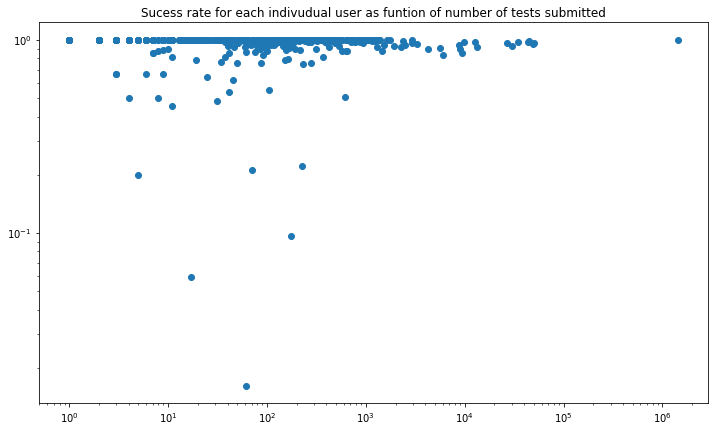

In [33]:
fig, ax = plt.subplots(figsize = (12,7))

plt.scatter(user_succ.user_id,user_succ.fraction)
plt.xscale('log')
plt.yscale('log')
plt.title('Sucess rate for each indivudual user as funtion of number of tests submitted')
plt.show()